In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# DATA UNDERSTANDING / PREPROCESSING

In [2]:
pd.options.display.max_seq_items = 2000


In [ ]:
data=pd.read_csv('  ')

In [4]:
data.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,4.000000e+05,400000.000000,400000.000000,400000.00000,4.000000e+05,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,...,4.000000e+05,4.000000e+05,4.000000e+05,4.000000e+05,4.000000e+05,4.000000e+05,4.000000e+05,4.000000e+05,4.000000e+05,400000.000000
mean,1.559248e+06,30.628498,0.775868,13015.81057,5.309388e+02,348.045265,294.560038,332.813210,16.389087,33.690530,...,2.445302e+08,9.908489e+03,4.384502e+03,1.602593e+04,6.695071e+03,3.489896e+05,3.003204e+04,3.806017e+05,3.220957e+05,0.500000
std,1.019320e+07,54.765609,11.886987,22843.26941,3.712795e+04,263.387341,252.726864,247.869945,48.781726,376.777231,...,4.298061e+08,2.385492e+05,1.497923e+05,4.283030e+05,1.727424e+05,3.944438e+06,6.805800e+05,4.199608e+06,3.810725e+06,0.500001
min,1.000000e+00,1.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.000000e+00,2.000000,0.000000,31.00000,0.000000e+00,25.000000,0.000000,12.400000,0.000000,0.000000,...,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.160000e+02,4.000000,0.000000,2064.00000,0.000000e+00,440.000000,401.000000,440.000000,0.000000,0.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.500000
75%,1.410900e+04,34.000000,0.000000,14528.00000,0.000000e+00,440.000000,440.000000,440.000000,0.000000,0.000000,...,5.160000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,1.200000e+08,8448.000000,1862.000000,174240.00000,8.829488e+06,3569.000000,2020.000000,2666.086957,1423.703402,37960.000000,...,1.000000e+09,2.420000e+07,2.060000e+07,5.380000e+07,1.721664e+07,1.147455e+08,5.072577e+07,1.147455e+08,1.147455e+08,1.000000


In [5]:
print(data.dtypes)

Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
Total Length of Bwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                            int64
Length: 61, dtype: object


In [3]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
if categorical_columns.any():
    print(list(categorical_columns))

#No categorical geatures

In [4]:
null_counts=data.isna().sum()
print(null_counts)

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 61, dtype: int64


In [5]:
if data.isnull().values.any():
    print("There are null values in the DataFrame.")
else:
    print("No null values in the DataFrame.")


No null values in the DataFrame.


In [6]:
data.Label.value_counts()

Label
1    200000
0    200000
Name: count, dtype: int64

In [7]:
y=data.drop(['Label'],axis=1)
X_train,y_train,X_test,y_test=train_test_split(data.drop(['Label'],axis=1),y,test_size=0.2)

# MODEL EXPERIMENTING 

In [8]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

2024-12-12 02:00:07.952462: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 02:00:08.132233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733965208.200749   49132 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733965208.218804   49132 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 02:00:08.375681: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [9]:
features = data.drop(['Label'],axis=1) # All 60 features
labels = data.Label  # Labels: 0 or 1
normal_data = features[labels == 0]
scaler = MinMaxScaler()
normal_data_scaled = scaler.fit_transform(normal_data)

# Split into training and validation sets
train_data, val_data = train_test_split(normal_data_scaled, test_size=0.2, random_state=42)

In [10]:
output_dim = normal_data_scaled.shape[1]  # Number of features (60)
latent_dim = 32  # Dimensionality of noise input
BATCH_SIZE = 12
EPOCHS = 100

In [11]:
from tensorflow.keras import layers

def build_generator(input_dim, output_dim):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(output_dim, activation='tanh')  # Use linear activation for continuous data
    ])
    return model

input_dim = 30 # Latent space dimensionality
generator = build_generator(input_dim, output_dim)


/home/wdeww/anaconda3/envs/KIAN/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733965222.421206   49132 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2615 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


In [12]:
def build_discriminator(input_dim):
    model = tf.keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=input_dim),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')  # Outputs a probability
    ])
    return model

discriminator = build_discriminator(output_dim)

In [13]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

2024-12-12 02:01:35.341441: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/100 - Generator Loss: 3.1608, Discriminator Loss: 0.3517


2024-12-12 02:02:11.684364: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2/100 - Generator Loss: 3.0267, Discriminator Loss: 0.3300


Epoch 3/100 - Generator Loss: 5.9511, Discriminator Loss: 0.0841


2024-12-12 02:03:24.619354: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4/100 - Generator Loss: 5.8894, Discriminator Loss: 0.0690


Epoch 5/100 - Generator Loss: 7.6031, Discriminator Loss: 0.0268


Epoch 6/100 - Generator Loss: 8.3202, Discriminator Loss: 0.0197


Epoch 7/100 - Generator Loss: 7.8404, Discriminator Loss: 0.0370


2024-12-12 02:05:50.760193: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8/100 - Generator Loss: 6.6491, Discriminator Loss: 0.0530


Epoch 9/100 - Generator Loss: 5.0259, Discriminator Loss: 0.0815


Epoch 10/100 - Generator Loss: 5.0032, Discriminator Loss: 0.0716


Epoch 11/100 - Generator Loss: 5.2240, Discriminator Loss: 0.0635


Epoch 12/100 - Generator Loss: 5.4445, Discriminator Loss: 0.0589


Epoch 13/100 - Generator Loss: 5.6936, Discriminator Loss: 0.0519


Epoch 14/100 - Generator Loss: 5.8644, Discriminator Loss: 0.0479


Epoch 15/100 - Generator Loss: 6.1923, Discriminator Loss: 0.0376


2024-12-12 02:10:39.539007: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16/100 - Generator Loss: 6.1419, Discriminator Loss: 0.0462


Epoch 17/100 - Generator Loss: 6.2976, Discriminator Loss: 0.0438


Epoch 18/100 - Generator Loss: 5.9400, Discriminator Loss: 0.0483


Epoch 19/100 - Generator Loss: 6.4678, Discriminator Loss: 0.0430


Epoch 20/100 - Generator Loss: 6.1877, Discriminator Loss: 0.0411


Epoch 21/100 - Generator Loss: 6.3349, Discriminator Loss: 0.0379


Epoch 22/100 - Generator Loss: 6.5566, Discriminator Loss: 0.0289


Epoch 23/100 - Generator Loss: 6.5903, Discriminator Loss: 0.0333


Epoch 24/100 - Generator Loss: 7.0008, Discriminator Loss: 0.0335


Epoch 25/100 - Generator Loss: 6.7879, Discriminator Loss: 0.0298


Epoch 26/100 - Generator Loss: 6.9693, Discriminator Loss: 0.0284


Epoch 27/100 - Generator Loss: 6.8614, Discriminator Loss: 0.0284


Epoch 28/100 - Generator Loss: 7.0101, Discriminator Loss: 0.0240


Epoch 29/100 - Generator Loss: 7.2655, Discriminator Loss: 0.0362


Epoch 30/100 - Generator Loss: 7.1239, Discriminator Loss: 0.0293


Epoch 31/100 - Generator Loss: 7.3056, Discriminator Loss: 0.0289


2024-12-12 02:20:15.238282: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 32/100 - Generator Loss: 7.3377, Discriminator Loss: 0.0228


Epoch 33/100 - Generator Loss: 7.7808, Discriminator Loss: 0.0201


Epoch 34/100 - Generator Loss: 7.2269, Discriminator Loss: 0.0265


Epoch 35/100 - Generator Loss: 7.7424, Discriminator Loss: 0.0207


Epoch 36/100 - Generator Loss: 8.0879, Discriminator Loss: 0.0238


Epoch 37/100 - Generator Loss: 8.3063, Discriminator Loss: 0.0182


Epoch 38/100 - Generator Loss: 8.3166, Discriminator Loss: 0.0215


Epoch 39/100 - Generator Loss: 7.6051, Discriminator Loss: 0.0240


Epoch 40/100 - Generator Loss: 7.2252, Discriminator Loss: 0.0392


Epoch 41/100 - Generator Loss: 7.9395, Discriminator Loss: 0.0187


Epoch 42/100 - Generator Loss: 7.7572, Discriminator Loss: 0.0290


Epoch 43/100 - Generator Loss: 8.7882, Discriminator Loss: 0.0173


Epoch 44/100 - Generator Loss: 8.5179, Discriminator Loss: 0.0201


Epoch 45/100 - Generator Loss: 7.7598, Discriminator Loss: 0.0281


Epoch 46/100 - Generator Loss: 7.8525, Discriminator Loss: 0.0245


Epoch 47/100 - Generator Loss: 8.8581, Discriminator Loss: 0.0208


Epoch 48/100 - Generator Loss: 7.3050, Discriminator Loss: 0.0214


Epoch 49/100 - Generator Loss: 8.2158, Discriminator Loss: 0.0124


Epoch 50/100 - Generator Loss: 8.0925, Discriminator Loss: 0.0247


Epoch 51/100 - Generator Loss: 7.4049, Discriminator Loss: 0.0206


Epoch 52/100 - Generator Loss: 6.9585, Discriminator Loss: 0.0367


Epoch 53/100 - Generator Loss: 6.9441, Discriminator Loss: 0.0271


Epoch 54/100 - Generator Loss: 7.3775, Discriminator Loss: 0.0335


Epoch 55/100 - Generator Loss: 6.6629, Discriminator Loss: 0.0386


Epoch 56/100 - Generator Loss: 7.7020, Discriminator Loss: 0.0166


Epoch 57/100 - Generator Loss: 7.4569, Discriminator Loss: 0.0305


Epoch 58/100 - Generator Loss: 7.5497, Discriminator Loss: 0.0193


Epoch 59/100 - Generator Loss: 7.5974, Discriminator Loss: 0.0196


Epoch 60/100 - Generator Loss: 6.9274, Discriminator Loss: 0.0295


Epoch 61/100 - Generator Loss: 7.0930, Discriminator Loss: 0.0214


Epoch 62/100 - Generator Loss: 6.9654, Discriminator Loss: 0.0219


Epoch 63/100 - Generator Loss: 7.0764, Discriminator Loss: 0.0188


2024-12-12 02:39:30.654422: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 64/100 - Generator Loss: 6.8969, Discriminator Loss: 0.0175


Epoch 65/100 - Generator Loss: 7.0715, Discriminator Loss: 0.0183


Epoch 66/100 - Generator Loss: 7.0142, Discriminator Loss: 0.0179


Epoch 67/100 - Generator Loss: 6.9565, Discriminator Loss: 0.0179


Epoch 68/100 - Generator Loss: 6.8534, Discriminator Loss: 0.0188


Epoch 69/100 - Generator Loss: 6.2910, Discriminator Loss: 0.0506


Epoch 70/100 - Generator Loss: 6.0712, Discriminator Loss: 0.0396


Epoch 71/100 - Generator Loss: 6.1331, Discriminator Loss: 0.0385


Epoch 72/100 - Generator Loss: 7.8713, Discriminator Loss: 0.0349


Epoch 73/100 - Generator Loss: 6.1359, Discriminator Loss: 0.0473


Epoch 74/100 - Generator Loss: 6.2364, Discriminator Loss: 0.0501


Epoch 75/100 - Generator Loss: 6.2234, Discriminator Loss: 0.0436


Epoch 76/100 - Generator Loss: 6.7085, Discriminator Loss: 0.0483


Epoch 77/100 - Generator Loss: 6.5357, Discriminator Loss: 0.0466


Epoch 78/100 - Generator Loss: 6.2573, Discriminator Loss: 0.0552


Epoch 79/100 - Generator Loss: 6.1230, Discriminator Loss: 0.0503


Epoch 80/100 - Generator Loss: 6.4791, Discriminator Loss: 0.0371


Epoch 81/100 - Generator Loss: 6.1606, Discriminator Loss: 0.0568


Epoch 82/100 - Generator Loss: 6.3841, Discriminator Loss: 0.0351


Epoch 83/100 - Generator Loss: 6.6431, Discriminator Loss: 0.0303


Epoch 84/100 - Generator Loss: 6.4735, Discriminator Loss: 0.0267


Epoch 85/100 - Generator Loss: 5.9910, Discriminator Loss: 0.0742


Epoch 86/100 - Generator Loss: 5.7513, Discriminator Loss: 0.0548


Epoch 87/100 - Generator Loss: 6.1929, Discriminator Loss: 0.0439


Epoch 88/100 - Generator Loss: 6.2499, Discriminator Loss: 0.0423


Epoch 89/100 - Generator Loss: 6.3249, Discriminator Loss: 0.0315


Epoch 90/100 - Generator Loss: 5.4474, Discriminator Loss: 0.0614


Epoch 91/100 - Generator Loss: 5.6130, Discriminator Loss: 0.0518


Epoch 92/100 - Generator Loss: 5.7131, Discriminator Loss: 0.0602


Epoch 93/100 - Generator Loss: 6.1050, Discriminator Loss: 0.0374


Epoch 94/100 - Generator Loss: 5.7885, Discriminator Loss: 0.0511


Epoch 95/100 - Generator Loss: 5.6057, Discriminator Loss: 0.0448


Epoch 96/100 - Generator Loss: 6.1418, Discriminator Loss: 0.0361


Epoch 97/100 - Generator Loss: 5.6108, Discriminator Loss: 0.0520


Epoch 98/100 - Generator Loss: 6.2377, Discriminator Loss: 0.0359


Epoch 99/100 - Generator Loss: 6.0348, Discriminator Loss: 0.0422


Epoch 100/100 - Generator Loss: 5.4912, Discriminator Loss: 0.0628


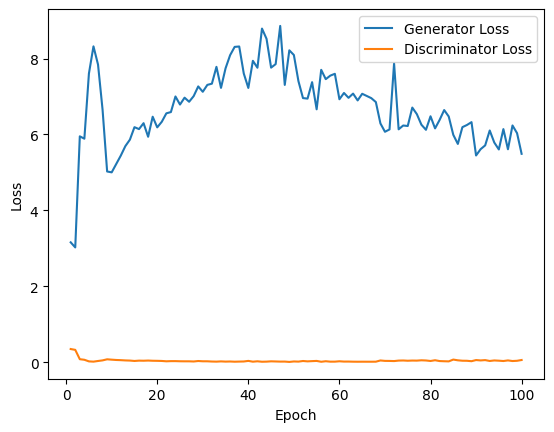

In [14]:
NOISE_DIM = input_dim

@tf.function
def train_step(real_data):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        fake_data = generator(noise, training=True)

        real_output = discriminator(real_data, training=True)
        fake_output = discriminator(fake_data, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

def train(dataset, epochs):
    metrics = {"gen_loss": [], "disc_loss": []}  # To track generator and discriminator losses

    for epoch in range(epochs):
        epoch_gen_loss = 0
        epoch_disc_loss = 0
        batch_count = 0

        for real_data in dataset:
            gen_loss, disc_loss = train_step(real_data)

            epoch_gen_loss += gen_loss
            epoch_disc_loss += disc_loss
            batch_count += 1

        # Compute average loss for the epoch
        epoch_gen_loss /= batch_count
        epoch_disc_loss /= batch_count

        metrics["gen_loss"].append(epoch_gen_loss.numpy())
        metrics["disc_loss"].append(epoch_disc_loss.numpy())

        print(f"Epoch {epoch+1}/{epochs} - Generator Loss: {epoch_gen_loss:.4f}, Discriminator Loss: {epoch_disc_loss:.4f}")

        # Save the models at the end of each epoch (optional)
        generator.save(f"generator_epoch_{epoch+1}.h5")
        discriminator.save(f"discriminator_epoch_{epoch+1}.h5")

    # Save final models
    generator.save("generator_final.h5")
    discriminator.save("discriminator_final.h5")

    return metrics

# Prepare the dataset
dataset = tf.data.Dataset.from_tensor_slices(train_data).shuffle(10000).batch(BATCH_SIZE)

# Train the GAN
metrics = train(dataset, EPOCHS)

# Example: Plot the loss metrics after training
import matplotlib.pyplot as plt
plt.plot(range(1, EPOCHS + 1), metrics["gen_loss"], label="Generator Loss")
plt.plot(range(1, EPOCHS + 1), metrics["disc_loss"], label="Discriminator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
def detect_anomalies(test_data):
    reconstructed = generator.predict(test_data)
    reconstruction_error = np.mean(np.abs(test_data - reconstructed), axis=1)
    return reconstruction_error

# Evaluate on validation set
val_error = detect_anomalies(val_data)
threshold = np.percentile(val_error, 95)  # Use the 95th percentile as threshold
#Temps inference (To be noted)
